<a href="https://colab.research.google.com/github/HemanNiroula/ai-course/blob/main/2510308_HemantaNiroula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# import every library we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Loading the data set
df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin-1')

# problem **1A**

---



In [56]:
# Task 1 : filter for 2022 only
unique_years = df['year'].unique()
hdi_2022 = df[df['year'] == 2022].copy()

Task 2 : showing basic info

In [57]:
# this shows the 1st 5 rows of the table
hdi_2022.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [58]:
# this shows the total rows and column of the table
hdi_2022.shape

(206, 30)

In [59]:
# this shows the data types of the table
hdi_2022.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


 Task 3 : Cleaning the data

In [60]:
#checks for null values.and add the total knull values
hdi_2022.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [61]:
# I will drop the missing values to keep the data clean
hdi_2022 = hdi_2022.dropna()

In [62]:
# Removing any duplicate row
hdi_2022 = hdi_2022.drop_duplicates()

Task 4 : Basic Statistics

In [63]:
mean_val = hdi_2022['hdi'].mean() # calculates mean
median_val = hdi_2022['hdi'].median() # calculates median
std_val = hdi_2022['hdi'].std() # calculates standard deviation
{"mean": mean_val,"median":median_val}

{'mean': np.float64(0.7314177215189873), 'median': 0.759}

In [64]:
# Finding the highest and lowest countries
top_country = hdi_2022.loc[hdi_2022['hdi'].idxmax(),'country']
bottom_country = hdi_2022.loc[hdi_2022['hdi'].idxmin(),'country']
{"Highest":top_country,"Lowest":bottom_country}

{'Highest': 'Switzerland', 'Lowest': 'Somalia'}

Task 5: sorting by GNI for countries with HDI > 0.8

In [65]:
high_hdi = hdi_2022[hdi_2022['hdi'] > 0.800]
top_10_gni = high_hdi.sort_values('gross_inc_percap', ascending=False).head(10)
top_10_gni[['country','gross_inc_percap']]

,country,gross_inc_percap
4718,Qatar,95944.37754
5213,Singapore,88761.14559
2705,Ireland,87467.51391
3398,Luxembourg,78554.23640
6104,United Arab Emirates,74103.71494
5609,Switzerland,69432.78669
4322,Norway,69189.76165
6170,United States,65564.93798
1550,Denmark,62018.95694
824,Brunei Darussalam,59245.63485


Task 6: making the HDI categories

In [66]:
def get_category(score):
    if score < 0.550:
        return "Low"
    elif score >= 0.550 and score < 0.700:
        return "Medium"
    elif score >= 0.700 and score < 0.800:
        return "High"
    else:
        return "Very High"

# applying the hdi category function to create a new column
hdi_2022['HDI_Category'] = hdi_2022['hdi'].apply(get_category)

# saving the updated data frame
hdi_2022.to_csv('HDI_category_added.csv', index=False)

In [67]:
# seeing the result up to now
hdi_2022.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,HDI_Category
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,Low
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367,High
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199,High
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568,Medium
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512,Very High


# **PROBLEM 1B**

In [68]:
# Filtering for 2020 to 2022
years_needed = [2020, 2021, 2022]
hdi_recent = df[df['year'].isin(years_needed)].copy()

In [69]:
# creating region column (continent-wise) as instructed by the teacher
region_map = {
    # South Asia
    'Afghanistan': 'South Asia', 'Bangladesh': 'South Asia', 'Bhutan': 'South Asia',
    'India': 'South Asia', 'Maldives': 'South Asia', 'Nepal': 'South Asia',
    'Pakistan': 'South Asia', 'Sri Lanka': 'South Asia',

    # Middle East (
    'Bahrain': 'Middle East', 'Iran': 'Middle East', 'Iraq': 'Middle East',
    'Israel': 'Middle East', 'Jordan': 'Middle East', 'Kuwait': 'Middle East',
    'Lebanon': 'Middle East', 'Oman': 'Middle East', 'Palestine': 'Middle East',
    'Qatar': 'Middle East', 'Saudi Arabia': 'Middle East', 'Syria': 'Middle East',
    'United Arab Emirates': 'Middle East', 'Yemen': 'Middle East',

    # A few others for the bar chart
    'China': 'East Asia', 'Norway': 'Europe', 'Germany': 'Europe',
    'France': 'Europe', 'United Kingdom': 'Europe',
    'United States': 'North America', 'Canada': 'North America',
    'Australia': 'Oceania', 'Brazil': 'South America', 'Nigeria': 'Africa'
}

# Applying the map
hdi_recent['region'] = hdi_recent['country'].map(region_map)


In [70]:
# checking if any were missed
print("Missing regions:", hdi_recent['region'].isnull().sum())

Missing regions: 531


In [71]:
# Fixing the 'missing issue'
# We only want to keep the rows where we assigned a region for our charts.
# this removes the 531 missing ones so they dont break the plots
hdi_recent = hdi_recent.dropna(subset=['region']).copy()

In [72]:
# 4. Save the CSV (Using the one with regions)
hdi_recent.to_csv('HDI_problem1B.csv', index=False)

In [73]:
# Checking the updated table of data
hdi_recent.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,region
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
294,295,AUS,Australia,2020,0.948,84.324,25.670050,0.930065,0.961623,85.719,...,0.074,94.580063,94.430069,36.725664,63.274336,60.21,70.04,15.453230,27.8755,Oceania
295,296,AUS,Australia,2021,0.949,84.526,25.921089,0.931900,0.960859,85.840,...,0.073,94.580063,94.430069,37.885463,62.114537,61.23,70.64,14.914763,27.5779,Oceania


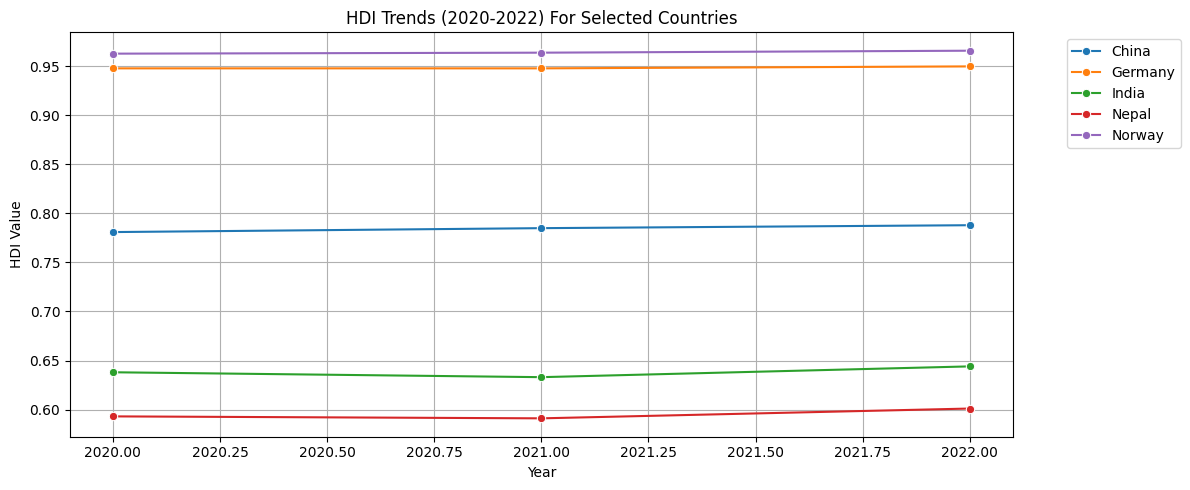

In [74]:
#Line chart for 5 countries
my_countries = ['Nepal','India','China','Norway','Germany']
subset = hdi_recent[hdi_recent['country'].isin(my_countries)]

# For actual digram
plt.figure(figsize=(12,5))
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trends (2020-2022) For Selected Countries')
plt.xlabel('Year')
plt.ylabel('HDI Value')
plt.legend(title = 'country')
plt.grid(True)

# Moving the legend(index) box outside so it doesnt obstruct the chart
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')

# To stop the legend(index) from getting cut off when i save the image
plt.tight_layout()
plt.show()



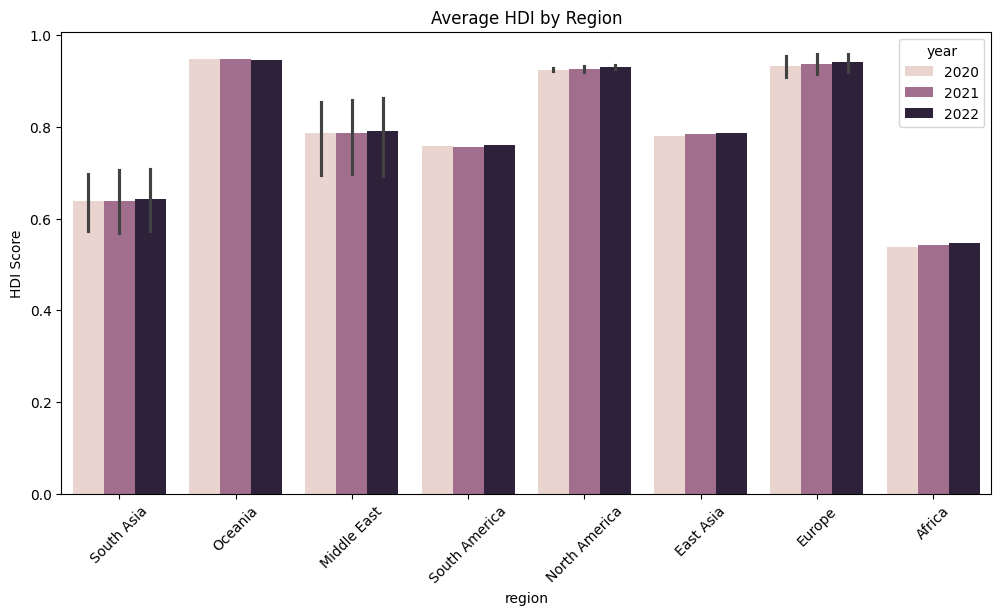

In [75]:
# Bar Chart for Regions
plt.figure(figsize=(12,6))
sns.barplot(data=hdi_recent, x='region', y='hdi', hue='year',)
plt.title('Average HDI by Region')
plt.ylabel('HDI Score')
plt.xticks(rotation=45)
plt.show()

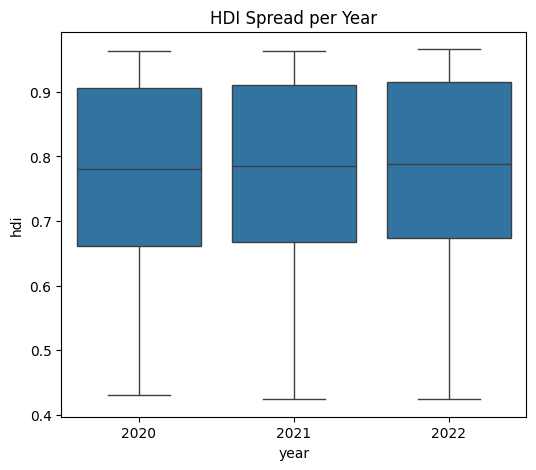

In [76]:
# Box Plot for distribution
plt.figure(figsize=(6,5))
sns.boxplot(data=hdi_recent, x='year', y='hdi')
plt.title('HDI Spread per Year')
plt.show()

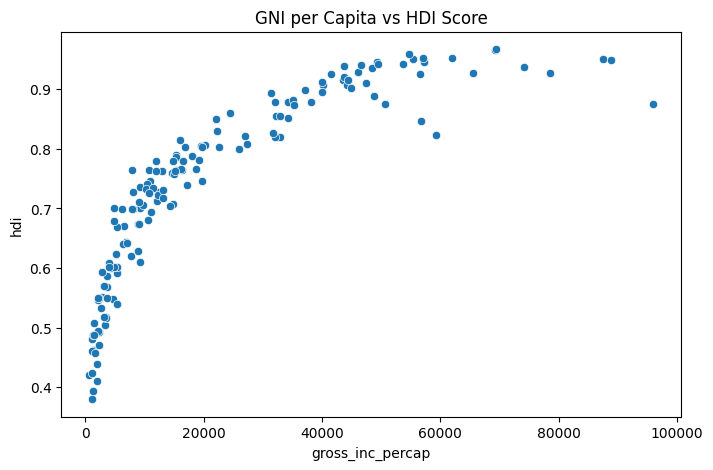

In [77]:
# Scatter Plot for GNI vs HDI
plt.figure(figsize=(8,5))
sns.scatterplot(data=hdi_2022, x='gross_inc_percap', y='hdi')
plt.title('GNI per Capita vs HDI Score')
plt.show()

# **PROBLEM 2**

---





In [78]:
# Filtering From south Asia countries only
south_asia_list = [
    'Afghanistan','Bangladesh','Bhutan',
    'India','Maldives','Nepal','Pakistan',
    'Sir-lanka']

hdi_sa = df[df['country'].isin(south_asia_list)].copy()
hdi_sa.to_csv('HDI SouthAsia.csv',index=False)

In [79]:
# Calculating the composite score based on the PDF formula
hdi_sa['Composite_Score'] = (0.3 * hdi_sa ['life_expectancy']) + (0.3 * hdi_sa['gross_inc_percap'])

In [119]:
# filtering for 2022 to do the ranking
sa_2022 = hdi_sa[hdi_sa['year'] == 2022].copy()
sa_2022['Composite_Rank'] = sa_2022['Composite_Score'].rank(ascending=False)
sa_2022['HDI_Rank'] = sa_2022['hdi'].rank(ascending=False)

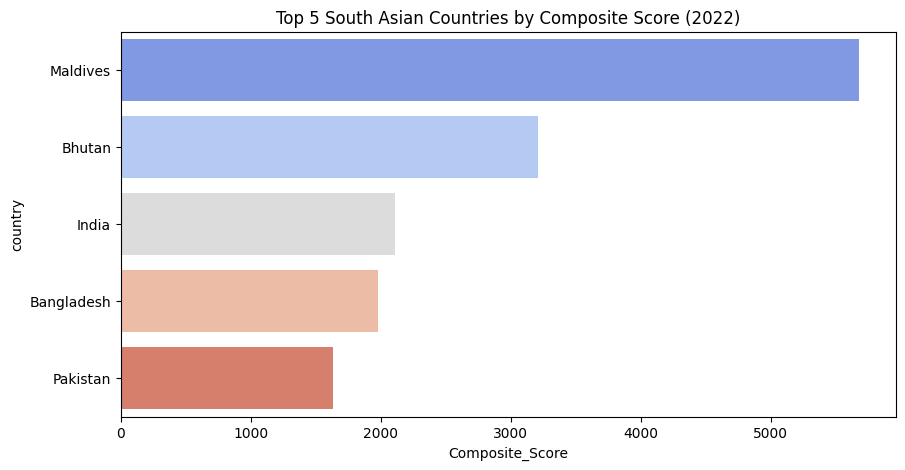

In [123]:
# Horizontal bar chart for top 5
top_5_composite = sa_2022.nlargest(5, 'Composite_Score')
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_composite, x='Composite_Score', y='country',hue = 'country', palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score (2022)')
plt.show()

In [125]:
# Task 3: Outlier Detection (1.5 * IQR)
def find_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return (data[column] < lower) | (data[column] > upper)

sa_2022['is_outlier'] = find_outliers_iqr(sa_2022, 'hdi') | find_outliers_iqr(sa_2022, 'gross_inc_percap')

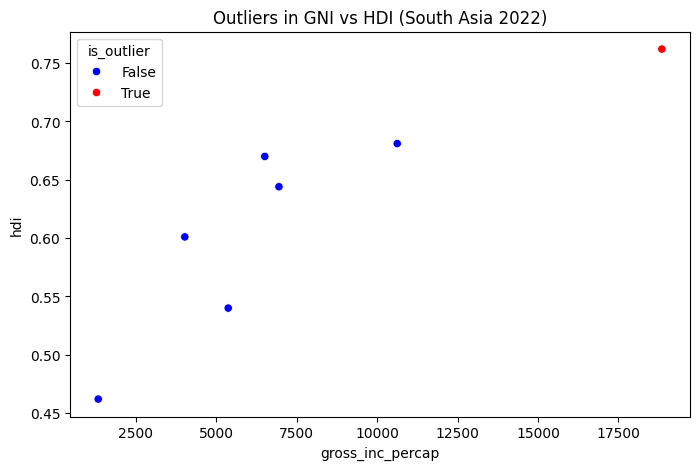

In [126]:
# Scatter plot highlighting outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sa_2022, x='gross_inc_percap', y='hdi', hue='is_outlier', palette={True:'red', False:'blue'})
plt.title('Outliers in GNI vs HDI (South Asia 2022)')
plt.show()

In [131]:
# Task 4: Metric Relationships (Pearson Correlation)
# we need to check two metrics: gender_development and life_expectancy
corr_gender = sa_2022['gender_development'].corr(sa_2022['hdi'])
corr_life = sa_2022['life_expectancy'].corr(sa_2022['hdi'])

print(f"Correlation (Gender vs HDI): {corr_gender:.3f}") # round up to 3 places
print(f"Correlation (Life Expectancy vs HDI): {corr_life:.3f}")

Correlation (Gender vs HDI): 0.911
Correlation (Life Expectancy vs HDI): 0.928


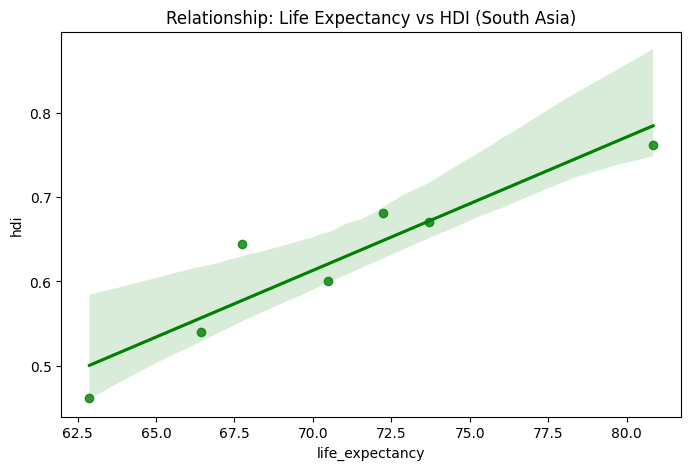

In [132]:
# Scatter plot with trendline for Life Expectancy
plt.figure(figsize=(8, 5))
sns.regplot(data=sa_2022, x='life_expectancy', y='hdi', color='green')
plt.title('Relationship: Life Expectancy vs HDI (South Asia)')
plt.show()

In [133]:
# Task 5: Gap Analysis
# formula: GNI HDI Gap = gross_inc_percap - hdi
sa_2022['GNI_HDI_Gap'] = sa_2022['gross_inc_percap'] - sa_2022['hdi']

In [134]:
# Ranking
top_positive = sa_2022.nlargest(3, 'GNI_HDI_Gap')
top_negative = sa_2022.nsmallest(3, 'GNI_HDI_Gap')

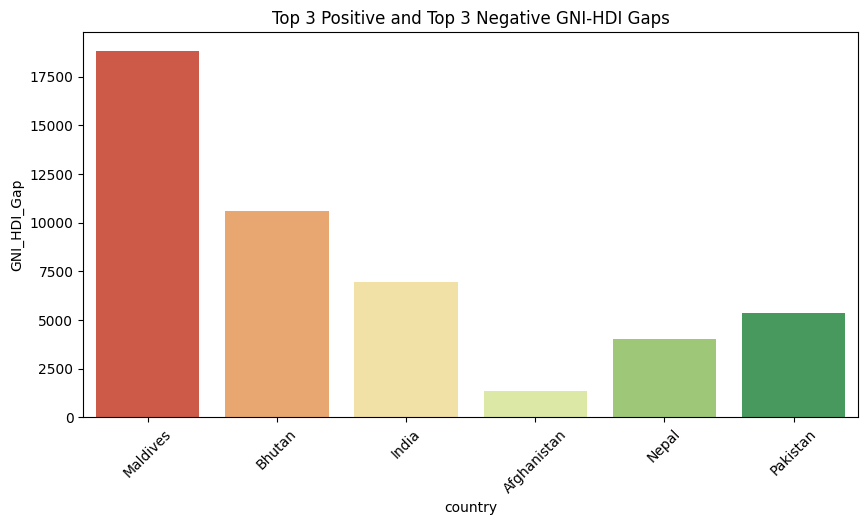

In [136]:
# Plotting the gaps
gap_plot_data = pd.concat([top_positive, top_negative])
plt.figure(figsize=(10, 5))
sns.barplot(data=gap_plot_data, x='country', y='GNI_HDI_Gap',hue='country', palette='RdYlGn')
plt.title('Top 3 Positive and Top 3 Negative GNI-HDI Gaps')
plt.xticks(rotation=45)
plt.show()

# **PROBLEM 3**

---



In [84]:
# Task 1: Create Lists and Subsets
sa_list = ["Afghanistan", "Bangladesh", "Bhutan",
           "India", "Maldives", "Nepal",
           "Pakistan", "Sri Lanka"]

me_list = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
           "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
           "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]


In [85]:
# Filtering the data we made in 1B
# We use the original 'country' column to be safe
sa_data = hdi_recent[hdi_recent['country'].isin(sa_list)].copy()
me_data = hdi_recent[hdi_recent['country'].isin(me_list)].copy()

In [86]:
# Saving the CSVs as requested
sa_data.to_csv('HDI SouthAsia 2020 2022.csv', index=False)
me_data.to_csv('HDI MiddleEast 2020 2022.csv', index=False)

In [87]:
# Task 2: Descriptive Statistics

#For South Asia
{"South Asia Mean HDI:": sa_data['hdi'].mean()}
{"South Asia Std Dev:": sa_data['hdi'].std()}

{'South Asia Std Dev:': 0.09827331747496995}

In [88]:
#For Middle East
{"Middle East Mean HDI:": me_data['hdi'].mean()}
{"Middle East Std Dev:": me_data['hdi'].std()}

{'Middle East Std Dev:': 0.14129476362297624}

In [89]:
# Task 3: Top 3 and Bottom 3 performers (using 2022 data)
sa_2022 = sa_data[sa_data['year'] == 2022]
me_2022 = me_data[me_data['year'] == 2022]

top_bot_sa = pd.concat([sa_2022.nlargest(3, 'hdi'), sa_2022.nsmallest(3, 'hdi')])
top_bot_me = pd.concat([me_2022.nlargest(3, 'hdi'), me_2022.nsmallest(3, 'hdi')])

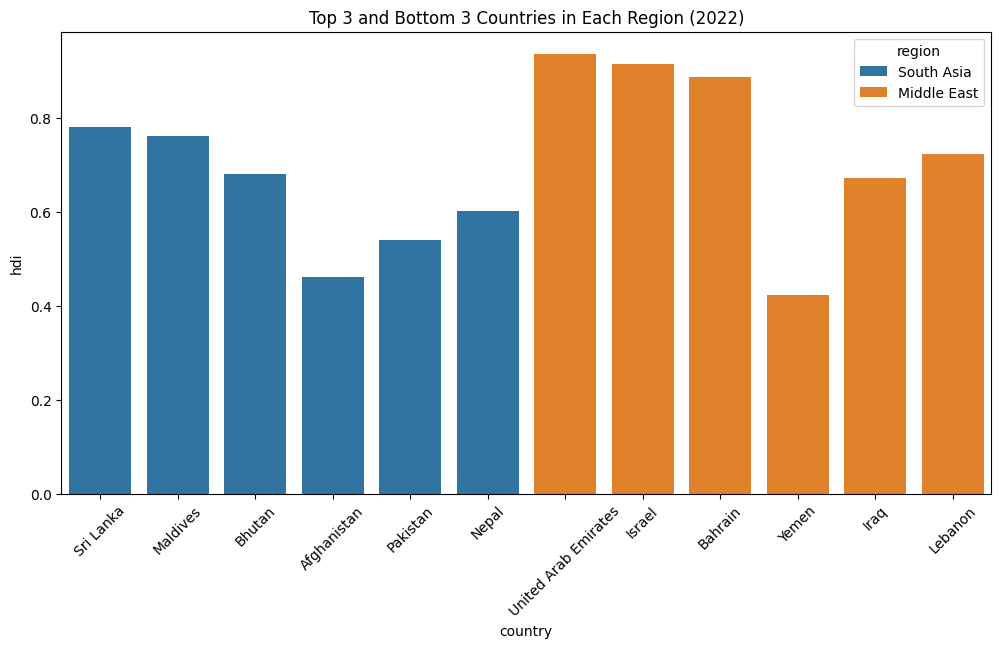

In [90]:
# Bar chart for Top/Bottom performers
plt.figure(figsize=(12, 6))
combined_performers = pd.concat([top_bot_sa, top_bot_me])
sns.barplot(data=combined_performers, x='country', y='hdi', hue='region')
plt.title('Top 3 and Bottom 3 Countries in Each Region (2022)')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Task 4: Metric Comparisons (Gender, Life Expectancy, GNI)
# Getting averages for each region
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
sa_metrics = sa_data[metrics].mean().to_frame(name='Score')
sa_metrics['Region'] = 'South Asia'
me_metrics = me_data[metrics].mean().to_frame(name='Score')
me_metrics['Region'] = 'Middle East'

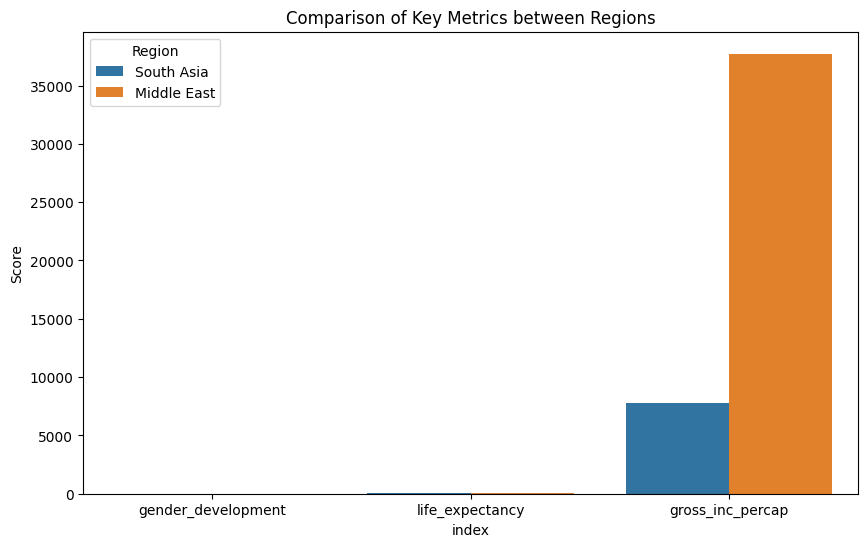

In [92]:
# Plotting the comparison
combined_metrics = pd.concat([sa_metrics, me_metrics]).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_metrics, x='index', y='Score', hue='Region')
plt.title('Comparison of Key Metrics between Regions')
plt.show()

In [93]:
# Task 5: HDI Disparity (Range and CV)
sa_range = sa_data['hdi'].max() - sa_data['hdi'].min()
me_range = me_data['hdi'].max() - me_data['hdi'].min()

In [94]:
# To calculate the coefficient of variation (CV) for HDI in each region
# CV = standard deviation / mean
sa_cv = sa_data['hdi'].std() / sa_data['hdi'].mean()
me_cv = me_data['hdi'].std() / me_data['hdi'].mean()

In [95]:
# For South Asia
{'South Asia': sa_range, 'CV':sa_cv}

{'South Asia': 0.321, 'CV': np.float64(0.1536520924690084)}

In [96]:
# For Middle East
{"Middle East":me_range, 'CV':me_cv}

{'Middle East': 0.5130000000000001, 'CV': np.float64(0.17910145193048382)}

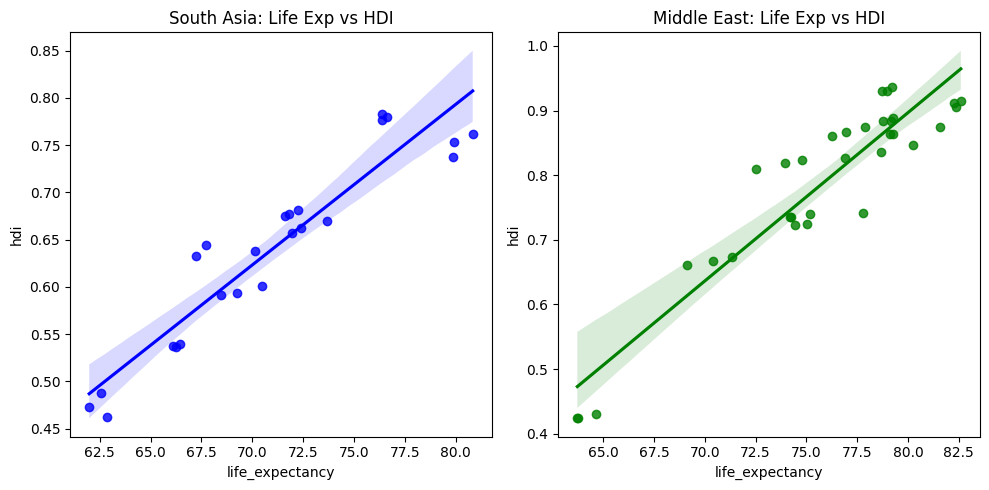

In [97]:
# Task 6: Correlation Analysis (Scatter plots with Trendlines)

# Correlation with Life Expectancy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.regplot(data=sa_data, x='life_expectancy', y='hdi', color='blue')
plt.title('South Asia: Life Exp vs HDI')

plt.subplot(1, 2, 2)
sns.regplot(data=me_data, x='life_expectancy', y='hdi', color='green')
plt.title('Middle East: Life Exp vs HDI')
plt.tight_layout()
plt.show()

In [98]:
# Task 7: Outlier Detection (1.5 x IQR Rule)
def get_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    # Marking them
    df['is_outlier'] = (df[col] < lower) | (df[col] > upper)
    return df

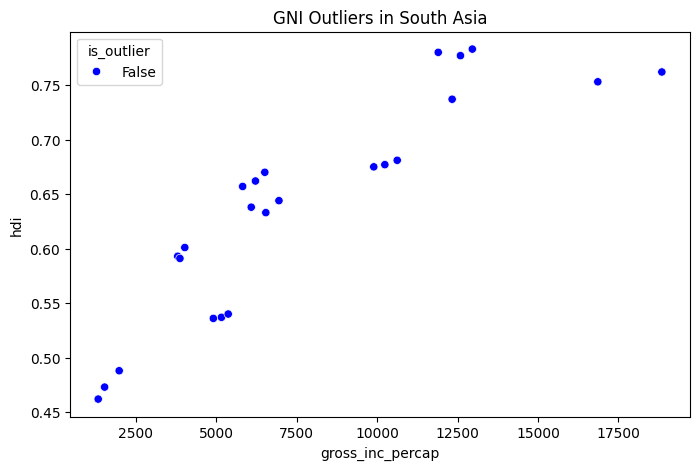

In [99]:
# Checking South Asia GNI outliers
sa_outlier_df = get_outliers(sa_data, 'gross_inc_percap')

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sa_outlier_df, x='gross_inc_percap', y='hdi', hue='is_outlier', palette={True:'red', False:'blue'})
plt.title('GNI Outliers in South Asia')
plt.show()